## Conexión a google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd ./drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [ ]:
%pwd

'/content/drive/MyDrive/Colab Notebooks'

## Importar los módulos *_utils

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/')
from my_utils import dataset_utils
from my_utils import eval_utils
from my_utils import nn_utils
from my_utils import results_utils

In [ ]:
import pickle

# Importar los resultados

In [ ]:
with open('./Results/SVC_HS_batch_1.df', 'rb') as file_handler:
  results_df = pickle.load(file_handler)

In [ ]:
for id in results_df['conf_id'].unique():
  print(id)

GQZgqx
hwmIFg
tgCmGg
fwZpdd
wavzCG


In [ ]:
results_df.head()

,conf_id,model_type,architecture,A_acc,A1_f1
0,GQZgqx,F,SVC-HS,0.689375,0.679777
1,GQZgqx,F,SVC-HS,0.715000,0.699624
2,GQZgqx,F,SVC-HS,0.708750,0.703137
3,GQZgqx,F,SVC-HS,0.711875,0.697654
4,GQZgqx,F,SVC-HS,0.709375,0.694148


In [ ]:
y = results_df.loc[config_mask & model_type_mask,['A_acc']]
y.mean()

A_acc    0.745
dtype: float64

wavzCG
wavzCG
wavzCG
wavzCG
wavzCG


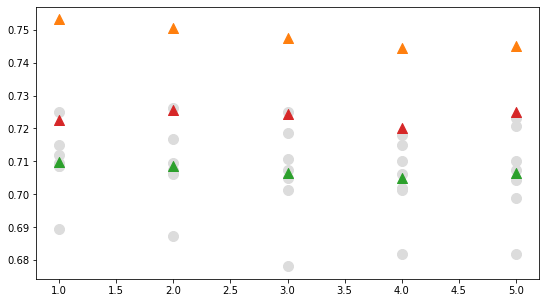

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib import colors

fig, ax = plt.subplots(figsize=(9, 5))
x_value = 0
markers_size = 100
for config_id in results_df['conf_id'].unique():
  x_value += 1 

  #print(id)
  config_mask = results_df['conf_id']==config_id
  model_type_mask = results_df['model_type']=='F'

  y = results_df.loc[config_mask & model_type_mask,['A_acc']]
  x = np.ones_like(y)* x_value

  ax.scatter(x, y, marker='o', s=markers_size, c='gainsboro')

  y = y.mean()
  x = np.ones_like(y)* x_value

  ax.scatter(x, y, marker='^', s=markers_size, c='tab:green')

  model_type_mask = results_df['model_type']=='G'
  y = results_df.loc[config_mask & model_type_mask,['A_acc']]
  x = np.ones_like(y) * x_value

  ax.scatter(x, y, marker='^', s=markers_size, c='tab:red')

  model_type_mask = results_df['model_type']=='E1'
  y = results_df.loc[config_mask & model_type_mask,['A_acc']]
  x = np.ones_like(y)* x_value

  ax.scatter(x, y, marker='^', s=markers_size, c='tab:orange')



In [ ]:
results_df.loc[3,[]]

# Results Distributions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib import colors
import seaborn as sns
import matplotlib.gridspec as gridspec

# freq = the percentage for each age group, and there’re 7 age groups.
def ax_settings(ax, var_name, x_min, x_max):
    ax.set_xlim(x_min,x_max)
    ax.set_yticks([])
    
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.spines['bottom'].set_edgecolor('#444444')
    ax.spines['bottom'].set_linewidth(2)
    
    ax.text(0.02, 0.085, var_name, fontsize=13, transform = ax.transAxes) 
    return None

def plotMetricDistributions(val_results, test_results, metric, x_min, x_max,
                            fig_title, x_label):
  n_classifiers = 8

  # Manipulate each axes object in the left. Try to tune some parameters and you'll know how each command works.
  # Create a figure, partition the figure into 7*2 boxes, set up an ax array to store axes objects
  fig = plt.figure(figsize=(10,7.5))

  fig.suptitle(fig_title, fontsize=14)
  gs = gridspec.GridSpec(nrows=n_classifiers, 
                        ncols=1, 
                        figure=fig, 
                        height_ratios= [1]*n_classifiers,
                        hspace=0.05
                        )

  ax = [None]*(n_classifiers)
  features_1 = ['SVC-LINEAR', 'SVC-SIGMOID', 'BiLSTM-1', 'BiLSTM-2','CNN-1', 'CNN-2', 'ConvLSTM-1', 'ConvLSTM-2']
  features_2 = ['SVC-LINEAR', 'SVC-SIGMOID', 'BiLSTM-1', 'BiLSTM-2','CNN-1', 'CNN-2', 'ConvLSTM-1', 'ConvLSTM-2']

  # this 'for loop' is to create a bunch of axes objects, and link them to GridSpec boxes. 
  # Then, we manipulate them with sns.kdeplot() and ax_settings() we just defined.
  for i in range(n_classifiers):

      ax[i] = fig.add_subplot(gs[i, 0])
      
      ax_settings(ax[i], features_1[i], x_min, x_max)    
      
      sns.kdeplot(data=val_results[(val_results.architecture == features_1[i])][metric], 
              ax=ax[i], shade=True, color="blue", legend=False)

      architecture_mask = test_results.architecture == features_1[i]
      model_type_mask = test_results.model_type=='F'
      sns.kdeplot(data=test_results.loc[architecture_mask & model_type_mask][metric], 
              ax=ax[i], shade=True, color="red", legend=False)

      if i < (n_classifiers - 1): 
          ax[i].set_xticks([])
          

  ax[0].legend(['validation', 'test'], facecolor='w')
  ax[n_classifiers - 1 ].set_xlabel(x_label)
  plt.show()

In [ ]:
plotMetricDistributions(validation_results, test_results, 'EMR', .5575, .823,
                        'EMR de acuerdo con el tipo de clasificador.', 'EMR')

## HTA 

[RidgeLines](https://www.datasource.ai/es/data-science-articles/una-guia-paso-a-paso-para-crear-visualizaciones-avanzadas-de-datos-de-python-con-seaborn-matplotlib)

[GridSpec](https://matplotlib.org/stable/tutorials/intermediate/gridspec.html)

In [ ]:
features = ['CNN-1', 'CNN-2', 'BiLSTM-1', 'BiLSTM-2', 'ConvLSTM-1', 'ConvLSTM-2']

results_list = ['./Results/final/SVC-LINEAR_HTA_VALIDATION.df',
                './Results/final/SVC-SIGMOID_HTA_VALIDATION.df',
                './Results/final/CNN-1_HTA_VALIDATION.df',
                './Results/final/CNN-2_HTA_VALIDATION.df',
                './Results/final/BiLSTM-1_HTA_VALIDATION.df',
                './Results/final/BiLSTM-2_HTA_VALIDATION.df',
                './Results/final/ConvLSTM-1_HTA_VALIDATION.df',
                './Results/final/ConvLSTM-2_HTA_VALIDATION.df']

df_val = results_utils.mergeDataFrames(results_list, './Results/final/HTA_MERGED_VALIDATION_RESULTS.df')

In [ ]:
results_list = ['./Results/SNN/SVC-LINEAR_HTA_TEST.df',
                './Results/final/SVC-SIGMOID_HTA_TEST.df',
                './Results/final/CNN-1_HTA_TEST.df',
                './Results/final/CNN-2_HTA_TEST.df',
                './Results/final/BiLSTM-1_HTA_TEST.df',
                './Results/final/BiLSTM-2_HTA_TEST.df',
                './Results/final/ConvLSTM-1_HTA_TEST.df',
                './Results/final/ConvLSTM-2_HTA_TEST.df']

df_test = results_utils.mergeDataFrames(results_list, './Results/final/HTA_MERGED_TEST_RESULTS.df')

In [ ]:
with open('./Results/final/HTA_MERGED_VALIDATION_RESULTS.df', 'rb') as file_handler:
  validation_results = pickle.load(file_handler)

In [ ]:
with open('./Results/final/HTA_MERGED_TEST_RESULTS.df', 'rb') as file_handler:
  test_results = pickle.load(file_handler)

In [ ]:
test_results.sort_values(by=['EMR'], ascending=False).head()

,conf_id,tm_ID,model_type,architecture,A_acc,B1_acc,B2_acc,A1_f1,B1_f1,B2_f1,F1_multi,EMR
110,WFNrfnfd,NaN,F,CNN-1,0.759375,0.862500,0.804375,0.735028,0.816971,0.762324,0.771441,0.720000
108,YBJbUNaX,NaN,E1,CNN-1,0.762500,0.865000,0.806875,0.736107,0.810865,0.760673,0.769215,0.719375
109,YBJbUNaX,NaN,E2,CNN-1,0.760000,0.862500,0.805625,0.734711,0.807362,0.760099,0.767391,0.716875
368,OMbpCcoK,NaN,E1,ConvLSTM-2,0.771250,0.867500,0.796875,0.753083,0.819037,0.760849,0.777656,0.715625
98,xCdcvedN,NaN,E1,CNN-1,0.771250,0.865625,0.798125,0.752535,0.814997,0.760383,0.775972,0.715000


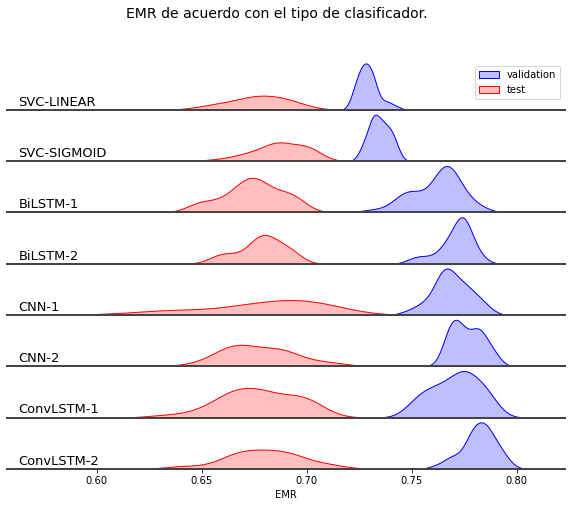

In [ ]:
plotMetricDistributions(validation_results, test_results, 'EMR', .5575, .823,
                        'EMR de acuerdo con el tipo de clasificador.', 'EMR')

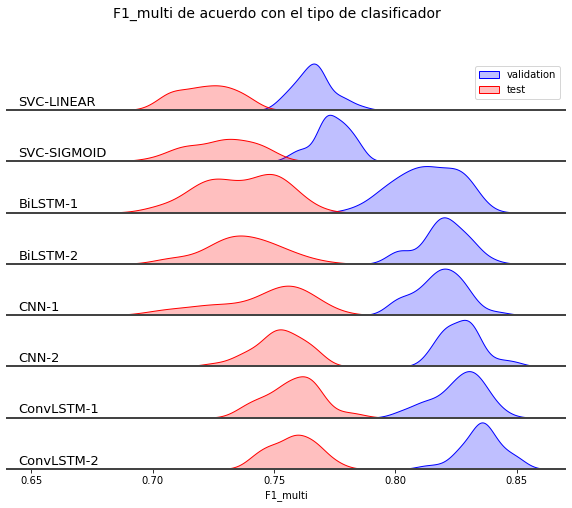

In [ ]:
plotMetricDistributions(validation_results, test_results, 'F1_multi', .64, .87,
                        'F1_multi de acuerdo con el tipo de clasificador', 'F1_multi')

In [ ]:
test_results.sort_values(by=['EMR'], ascending=False)

,conf_id,tm_ID,model_type,architecture,A_acc,B1_acc,B2_acc,A1_f1,B1_f1,B2_f1,F1_multi,EMR
110,WFNrfnfd,NaN,F,CNN-1,0.759375,0.862500,0.804375,0.735028,0.816971,0.762324,0.771441,0.720000
108,YBJbUNaX,NaN,E1,CNN-1,0.762500,0.865000,0.806875,0.736107,0.810865,0.760673,0.769215,0.719375
109,YBJbUNaX,NaN,E2,CNN-1,0.760000,0.862500,0.805625,0.734711,0.807362,0.760099,0.767391,0.716875
368,OMbpCcoK,NaN,E1,ConvLSTM-2,0.771250,0.867500,0.796875,0.753083,0.819037,0.760849,0.777656,0.715625
98,xCdcvedN,NaN,E1,CNN-1,0.771250,0.865625,0.798125,0.752535,0.814997,0.760383,0.775972,0.715000
...,...,...,...,...,...,...,...,...,...,...,...,...
43,Etgzct,NaN,G,SVC-LINEAR,0.735625,0.735625,0.703750,0.732424,0.423839,0.413059,0.523107,0.479375
16,lFupON,NaN,G,SVC-LINEAR,0.733750,0.735625,0.703750,0.731514,0.423839,0.413059,0.522804,0.471250
7,eKpEEc,NaN,G,SVC-LINEAR,0.731875,0.735625,0.703750,0.729655,0.423839,0.413059,0.522184,0.469375
34,JonAxF,NaN,G,SVC-LINEAR,0.728750,0.735625,0.703750,0.726597,0.423839,0.413059,0.521165,0.468750


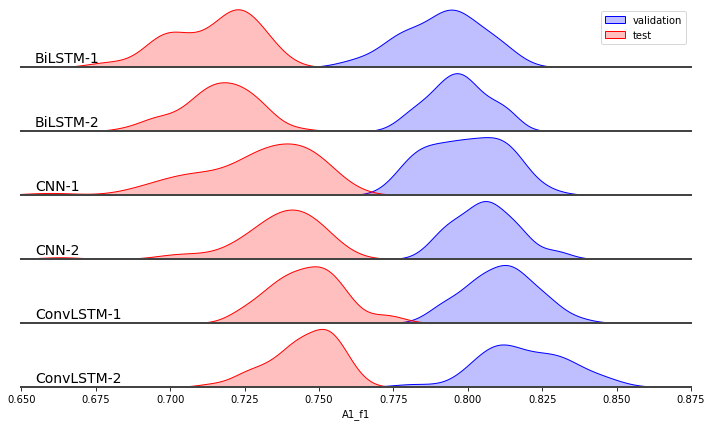

In [ ]:
plotMetricDistributions(validation_results, test_results, 'A1_f1', .65, .875)

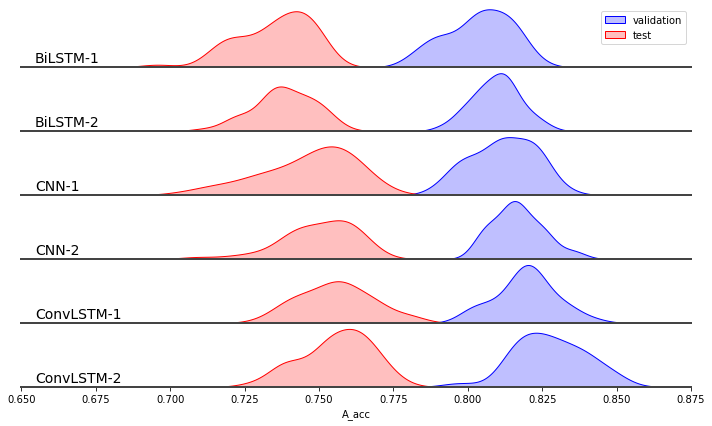

In [ ]:
plotMetricDistributions(validation_results, test_results, 'A_acc', .65, .875)

## HS 

[RidgeLines](https://www.datasource.ai/es/data-science-articles/una-guia-paso-a-paso-para-crear-visualizaciones-avanzadas-de-datos-de-python-con-seaborn-matplotlib)

[GridSpec](https://matplotlib.org/stable/tutorials/intermediate/gridspec.html)

In [ ]:
results_list = ['./Results/final/CNN-1_HS_VALIDATION.df',
                './Results/final/CNN-2_HS_VALIDATION.df',
                './Results/final/BiLSTM-1_HS_VALIDATION.df',
                './Results/final/BiLSTM-2_HS_VALIDATION.df',
                './Results/final/ConvLSTM-1_HS_VALIDATION.df',
                './Results/final/ConvLSTM-2_HS_VALIDATION.df']

df_val = results_utils.mergeDataFrames(results_list, './Results/final/HS_MERGED_VALIDATION_RESULTS.df')

In [ ]:
results_list = ['./Results/final/CNN-1_HS_TEST.df',
                './Results/final/CNN-2_HS_TEST.df',
                './Results/final/BiLSTM-1_HS_TEST.df',
                './Results/final/BiLSTM-2_HS_TEST.df',
                './Results/final/ConvLSTM-1_HS_TEST.df',
                './Results/final/ConvLSTM-2_HS_TEST.df']

df_test = results_utils.mergeDataFrames(results_list, './Results/final/HS_MERGED_TEST_RESULTS.df')

In [ ]:
with open('./Results/final/HS_MERGED_VALIDATION_RESULTS.df', 'rb') as file_handler:
  validation_results = pickle.load(file_handler)

In [ ]:
with open('./Results/final/HS_MERGED_TEST_RESULTS.df', 'rb') as file_handler:
  test_results = pickle.load(file_handler)

In [ ]:
validation_results.head()

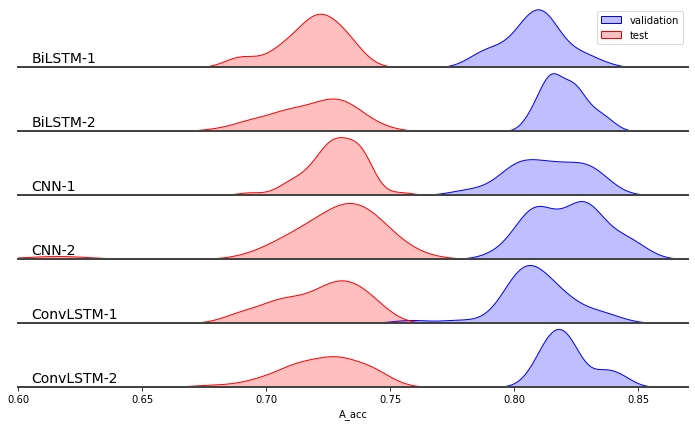

In [ ]:
plotMetricDistributions(validation_results, test_results, 'A_acc', .60, .87)

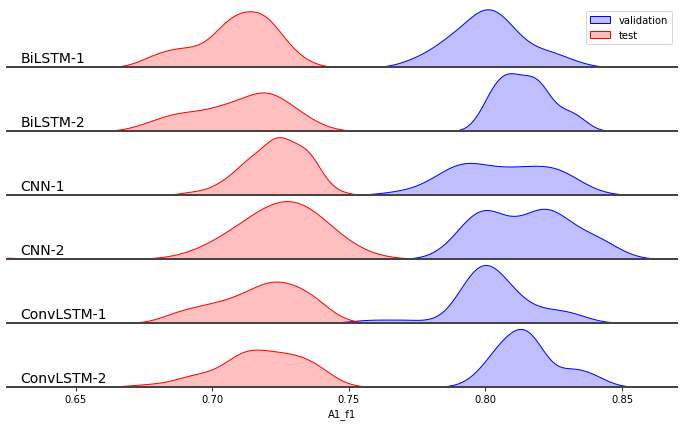

In [ ]:
plotMetricDistributions(validation_results, test_results, 'A1_f1', 0.625, 0.87)

# Confussion Matrix

In [ ]:
with open('./Results/final/HTA_MERGED_TEST_RESULTS.df', 'rb') as file_handler:
  test_results = pickle.load(file_handler)

In [ ]:
test_results.head(10)

In [ ]:
architectures_list = test_results.architecture.unique().tolist()

In [ ]:
model_type_mask = test_results.model_type.isin(['G'])
architecture_mask = test_results.architecture.isin(['CNN-1', 'CNN-2'])

results_subset = test_results.loc[model_type_mask & architecture_mask]
results_subset = results_subset.sort_values(by='EMR', ascending=False)

In [ ]:
results_subset.head()

,conf_id,tm_ID,model_type,architecture,A_acc,B1_acc,B2_acc,A1_f1,B1_f1,B2_f1,F1_multi,EMR


In [ ]:
from pandas import DataFrame
merged_results = DataFrame()

for architecture in ['SVC-LINEAR', 'SVC-SIGMOID']:
  for model_type in ['G','E1']:
    model_type_mask = test_results.model_type.isin([model_type])
    architecture_mask = test_results.architecture == architecture

    results_subset_1 = test_results.loc[model_type_mask & architecture_mask]
    results_subset_1 = results_subset_1.sort_values(by='EMR', ascending=False)
    merged_results=merged_results.append(results_subset_1.iloc[0], ignore_index=True)

In [ ]:
columns_to_show = ['architecture', 'model_type',
                   'A_acc', 'A1_f1',
                   'B1_acc', 'B1_f1',
                   'B2_acc', 'B2_f1',
                   'EMR', 'F1_multi']

In [ ]:
merged_results.loc[:, columns_to_show]

,architecture,model_type,A_acc,A1_f1,B1_acc,B1_f1,B2_acc,B2_f1,EMR,F1_multi
0,SVC-LINEAR,G,0.735625,0.732424,0.735625,0.423839,0.703750,0.413059,0.479375,0.523107
1,SVC-LINEAR,E1,0.741875,0.707429,0.853125,0.782669,0.798125,0.743756,0.705625,0.744618
2,SVC-SIGMOID,G,0.765000,0.755711,0.869375,0.820483,0.765625,0.736860,0.690625,0.771018
3,SVC-SIGMOID,E1,0.742500,0.700036,0.858750,0.788070,0.806875,0.744823,0.713125,0.744310


In [ ]:
for architecture in ['SVC-LINEAR', 'SVC-SIGMOID', 'BiLSTM', 'CNN', 'ConvLSTM']:
  for model_type in ['G','E1','E2']:
    model_type_mask = test_results.model_type.isin([model_type])
    architecture_mask = test_results.architecture.isin([architecture + '-1', architecture + '-2'])

    results_subset = test_results.loc[model_type_mask & architecture_mask]
    results_subset = results_subset.sort_values(by='EMR', ascending=False)
    merged_results=merged_results.append(results_subset.iloc[0], ignore_index=True)

In [ ]:
columns_to_show = ['architecture', 'conf_id', 'model_type',
                   'A_acc', 'A1_f1',
                   'B1_acc', 'B1_f1',
                   'B2_acc', 'B2_f1',
                   'EMR', 'F1_multi']

In [ ]:
merged_results.loc[:, columns_to_show]

,architecture,conf_id,model_type,A_acc,A1_f1,B1_acc,B1_f1,B2_acc,B2_f1,EMR,F1_multi
0,BiLSTM-1,WMgyUskY,G,0.743750,0.717467,0.859375,0.794917,0.770000,0.720381,0.695625,0.744255
1,BiLSTM-2,WMgyUskY,E1,0.751875,0.725847,0.863750,0.797321,0.785000,0.735880,0.703750,0.753016
2,BiLSTM-2,WMgyUskY,E2,0.753750,0.730277,0.865625,0.801165,0.776250,0.728327,0.698125,0.753256
3,CNN-2,GWVBtYHV,G,0.741875,0.703594,0.850000,0.777340,0.798125,0.736659,0.705625,0.739198
4,CNN-1,YBJbUNaX,E1,0.762500,0.736107,0.865000,0.810865,0.806875,0.760673,0.719375,0.769215
5,CNN-1,YBJbUNaX,E2,0.760000,0.734711,0.862500,0.807362,0.805625,0.760099,0.716875,0.767391
6,ConvLSTM-2,OMbpCcoK,G,0.753750,0.744145,0.866875,0.822942,0.753125,0.725810,0.683125,0.764299
7,ConvLSTM-2,OMbpCcoK,E1,0.771250,0.753083,0.867500,0.819037,0.796875,0.760849,0.715625,0.777656
8,ConvLSTM-2,OMbpCcoK,E2,0.773125,0.758081,0.871250,0.825990,0.791250,0.758910,0.714375,0.780994


In [ ]:
from pandas import DataFrame
merged_results = DataFrame()

for architecture in ['BiLSTM', 'CNN', 'ConvLSTM']:
  for model_type in ['G','E1','E2']:
    model_type_mask = test_results.model_type.isin([model_type])
    architecture_mask = test_results.architecture.isin([architecture + '-1', architecture + '-2'])

    results_subset = test_results.loc[model_type_mask & architecture_mask]
    results_subset = results_subset.sort_values(by='F1_multi', ascending=False)
    merged_results=merged_results.append(results_subset.iloc[0], ignore_index=False)

In [ ]:
merged_results

,A1_f1,A_acc,B1_acc,B1_f1,B2_acc,B2_f1,EMR,F1_multi,architecture,conf_id,model_type
187,0.724664,0.746250,0.857500,0.796499,0.757500,0.712332,0.688750,0.744498,BiLSTM-2,WMgyUskY,G
188,0.725847,0.751875,0.863750,0.797321,0.785000,0.735880,0.703750,0.753016,BiLSTM-2,WMgyUskY,E1
189,0.730277,0.753750,0.865625,0.801165,0.776250,0.728327,0.698125,0.753256,BiLSTM-2,WMgyUskY,E2
17,0.751041,0.761250,0.856250,0.816864,0.778125,0.751125,0.697500,0.773010,CNN-1,YBJbUNaX,G
8,0.752535,0.771250,0.865625,0.814997,0.798125,0.760383,0.715000,0.775972,CNN-1,xCdcvedN,E1
9,0.749822,0.766250,0.859375,0.808782,0.788750,0.753371,0.706875,0.770658,CNN-1,xCdcvedN,E2
257,0.751707,0.755625,0.853125,0.815177,0.760000,0.736910,0.671250,0.767931,ConvLSTM-2,plRnsaUy,G
238,0.769666,0.780625,0.875000,0.833055,0.779375,0.750417,0.711875,0.784379,ConvLSTM-1,SgTMMCRk,E1
239,0.772796,0.780625,0.872500,0.833284,0.770625,0.746779,0.705625,0.784286,ConvLSTM-1,SgTMMCRk,E2


In [ ]:
type(results_subset.iloc[0])

pandas.core.series.Series

## Experimentos B

### ADAM 4

In [ ]:
import pickle

In [ ]:
with open('./systems_evaluations/CNN_ADAM4_CV_EXP_B.dict', 'rb') as file_handler:
  cnn_cv_B1 = pickle.load(file_handler)

In [ ]:
cnn_val_B1 = dict(zip(cnn_cv_B1.keys(), [v[1] for v in cnn_cv_B1.values()]))

In [ ]:
with open('./systems_evaluations/CNN_ADAM4_TEST_EXP_B.dict', 'rb') as file_handler:
  cnn_test_B1 = pickle.load(file_handler)

In [ ]:
list(cnn_val_B1.values())[2].mean(axis=0)

### ADAM 5

In [ ]:
with open('./systems_evaluations/CNN_ADAM5_CV_EXP_B.dict', 'rb') as file_handler:
  cnn_cv_B2 = pickle.load(file_handler)

In [ ]:
cnn_val_B2 = dict(zip(cnn_cv_B2.keys(), [v[1] for v in cnn_cv_B2.values()]))

In [ ]:
with open('./systems_evaluations/CNN_ADAM5_TEST_EXP_B.dict', 'rb') as file_handler:
  cnn_test_B2 = pickle.load(file_handler)

In [ ]:
list(cnn_val_B2.values())[2].mean(axis=0)

A_acc       0.803601
B1_acc      0.897801
B2_acc      0.802400
A1_f1       0.792026
B1_f1       0.860280
B2_f1       0.780270
F1_multi    0.810858
EMR         0.756601
dtype: float64

### LSTM1

In [ ]:
with open('./systems_evaluations/LSTM_M1_S2_CROSS_VALIDATION.dict', 'rb') as file_handler:
  lstm1_cv = pickle.load(file_handler)

In [ ]:
lstm1_val = dict(zip(lstm1_cv.keys(), [v[1] for v in lstm1_cv.values()]))

In [ ]:
with open('./systems_evaluations/LSTM_M1_S2_TEST_RESULTS.dict', 'rb') as file_handler:
  lstm1_test= pickle.load(file_handler)

In [ ]:
with open('./systems_evaluations/LSTM_M2_S2_CROSS_VALIDATION.dict', 'rb') as file_handler:
  lstm2_cv = pickle.load(file_handler)

In [ ]:
lstm2_val = dict(zip(lstm2_cv.keys(), [v[1] for v in lstm2_cv.values()]))

In [ ]:
with open('./systems_evaluations/LSTM_M2_S2_TEST_RESULTS.dict', 'rb') as file_handler:
  lstm2_test= pickle.load(file_handler)

# Utils

In [ ]:
import numpy as np
from pandas import DataFrame
def getResultsSummary(results_dict):
  results_summaries = []
  for i, v in enumerate(results_dict.values()):
    emr_results = v['EMR']
    summary = {'min_acc':np.min(emr_results),
               'max_acc':np.max(emr_results),
               'mean_acc':np.mean(emr_results),
               'acc_std':np.std(emr_results)}
    results_summaries.append(summary)               

  return DataFrame(results_summaries)

In [ ]:
def getMedianStd(results_dict):
  std = []
  for r in results_dict.values():
    x1 = r.EMR.to_numpy()
    std.append(np.std(x1))

  std = np.array(std)

  return np.median(std)

In [ ]:
for k, v in cnn_val.items():
  print(k)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib import colors

def plotMeanValAaccVsTestAcc(cv_results_dict, test_results_dict, model_label):

  val_median_std = getMedianStd(cv_results_dict)

  empty_arrays= True
  x_array = None
  y_array = None
  mean_acc_values = []
  c_values_list = []

  colors_list = ["green", "red"]
  colormap = colors.ListedColormap(colors_list)

  fig, ax = plt.subplots()

  for system_id in cv_results_dict.keys():

    x1 = cv_results_dict[system_id][1].EMR.to_numpy()
    val_acc_std = np.std(x1)
    mean_val_acc = np.mean(x1) 

    mean_acc_values.extend([mean_val_acc]*7)

    y = test_results_dict[system_id].EMR.to_numpy()

    if empty_arrays:
      y_array = y
      empty_arrays = False

    else:
      y_array = np.concatenate((y_array,y)) 

    if val_acc_std < val_median_std:
      c_values_list.extend([0]*7)
    else:
      c_values_list.extend([1]*7)

    
    ax.scatter(mean_acc_values, y_array, marker='o', c=c_values_list, alpha=1.5, cmap=colormap)

    ax.set_xlabel(r'$\Delta_i$', fontsize=15)
    ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
    ax.set_title('mean_v_acc vs test_acc')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib import colors

def plotConfigurationsResults(test_results_dict, model_label):

  test_median_std = getTesMedianStd(test_results_dict, model_label)

  empty_arrays= True

  x_list = []
  y_array = None
  c_values_list = []

  colors_list = ["green", "red"]
  colormap = colors.ListedColormap(colors_list)

  fig, ax = plt.subplots()

  for idx in range(0,len(test_results_dict)):
    system_id = f"{model_label}-S2-C{idx}"

    y = test_results_dict[system_id].EMR.to_numpy()
    acc_std = np.std(y)

    x_list.extend([idx+1]*7)

    if empty_arrays:
      y_array = y
      empty_arrays = False

    else:
      y_array = np.concatenate((y_array,y)) 

    if acc_std < test_median_std:
      c_values_list.extend([0]*7)
    else:
      c_values_list.extend([1]*7)

  ax.scatter(x_list, y_array, marker='o', c=c_values_list, alpha=1.5, cmap=colormap)

  ax.set_xlabel(r'config_idx', fontsize=15)
  ax.set_ylabel(r'test_acc', fontsize=15)
  ax.set_title('test_acc resutls')
    #ax.set_xlim(0.78,0.79)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib import colors

def plotConfigurationsValResults(val_results_dict, model_label):
  

  val_median_std = getCvMedianStd(val_results_dict, model_label)

  empty_arrays= True

  x_list = []
  y_array = None
  c_values_list = []

  colors_list = ["green", "red"]
  colormap = colors.ListedColormap(colors_list)

  fig, ax = plt.subplots()

  for idx in range(0,len(val_results_dict)):
    system_id = f"{model_label}-S2-C{idx}"

    y = val_results_dict[system_id][1].EMR.to_numpy()
    acc_std = np.std(y)

    x_list.extend([idx+1]*7)

    if empty_arrays:
      y_array = y
      empty_arrays = False

    else:
      y_array = np.concatenate((y_array,y)) 

    if acc_std < val_median_std:
      c_values_list.extend([0]*7)
    else:
      c_values_list.extend([1]*7)

  ax.scatter(x_list, y_array, marker='o', c=c_values_list, alpha=1.5, cmap=colormap)

  ax.set_xlabel(r'config_idx', fontsize=15)
  ax.set_ylabel(r'test_acc', fontsize=15)
  ax.set_title('test_acc resutls')
    #ax.set_xlim(0.78,0.79)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib import colors

def plotResultsByFold(val_emr, test_emr, mean_val_acc):

  fig, ax = plt.subplots()

  ax.scatter(range(1,8), val_emr, marker='o')
  ax.scatter(range(1,8), test_emr, marker='o')

  ax.axhline(y=mean_val_acc)

  ax.set_xlabel(r'fold', fontsize=15)
  ax.set_ylabel(r'EMR', fontsize=15)
  ax.set_title('EMR results by fold')
    #ax.set_xlim(0.78,0.79)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plotResultsBoxPlots(results_dict, title_str, plot_type = 'boxplot'):
  n_results = len(results_dict)
  x_labels = [str(i) for i in range(n_results)]
  n_labels = len(x_labels)

  fig, axis = plt.subplots(figsize=(9, 4))
  EMR_results = [results_df.EMR.to_numpy() for results_df in results_dict.values()]

  if plot_type == 'boxplot':
    # BoxPlots
    axis.boxplot(EMR_results, showmeans=True)
    axis.set_title(title_str)
    #axis.set_ylim(*y_limits)

    axis.yaxis.grid(True)
    axis.set_xticks([y + 1 for y in range(n_labels)])
    axis.set_xlabel('config idx')
    axis.set_ylabel('acc')

  elif plot_type == 'violin':
    # Violin plot
    axis.violinplot(acc_data,
                  positions = [ y + 1 for y in range(n_labels) ],
                  showmeans=False,
                  showmedians=True)
    axis.set_title('{} results by {}'.format(metric,parameter))
    axis.set_ylim(*y_limits)

    axis.yaxis.grid(True)
    axis.set_xticks([ y + 1 for y in range(n_labels) ])
    axis.set_xlabel(parameter)
    axis.set_ylabel(metric)

    # add x-tick labels
    plt.setp(axis, xticks=[ y + 1 for y in range(n_labels) ], xticklabels=x_labels)
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

def plotValVsTestResuts(val_EMR, test_EMR):
  x = val_EMR
  y = test_EMR
  
  mean_val_acc = np.mean(x)

  fig, ax = plt.subplots()
  ax.scatter(x, y, marker='o')

  ax.set_xlabel(r'val_EMR', fontsize=15)
  ax.set_ylabel(r'test_EMR', fontsize=15)
  ax.set_title(f"Val EMR vs Test EMR")

  ax.axvline(x=mean_val_acc)

  ax.grid(True)
  fig.tight_layout()

  plt.show()

# cnn

## Experimentos A

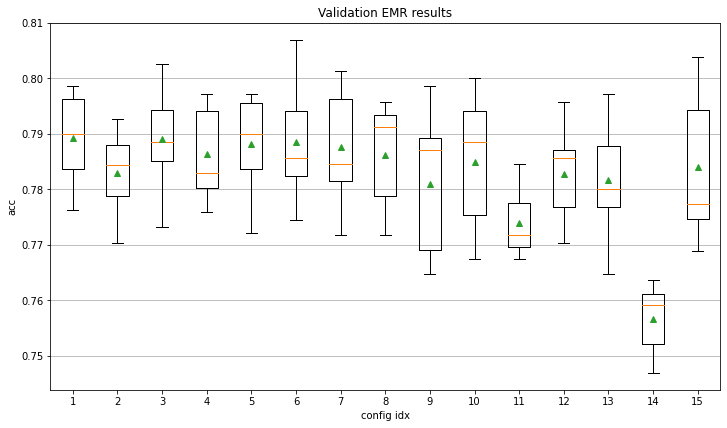

In [ ]:
plotResultsBoxPlots(cnn_val_A, 'Validation EMR results')

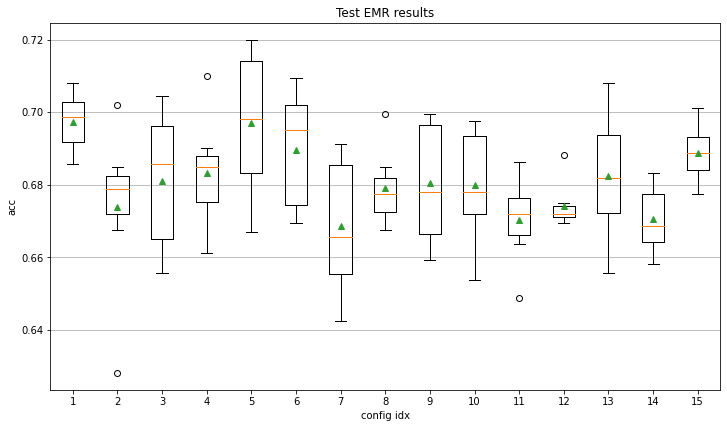

In [ ]:
plotResultsBoxPlots(cnn_test_A, 'Test EMR results')

In [ ]:
cnn_test.keys(CNN-S2-C0)

dict_keys(['CNN-S2-C0', 'CNN-S2-C1', 'CNN-S2-C2', 'CNN-S2-C3', 'CNN-S2-C4', 'CNN-S2-C5', 'CNN-S2-C6', 'CNN-S2-C7', 'CNN-S2-C8', 'CNN-S2-C9', 'CNN-S2-C10', 'CNN-S2-C11', 'CNN-S2-C12', 'CNN-S2-C13', 'CNN-S2-C14'])

In [ ]:
list(cnn_test.values())[0]

,A_acc,B1_acc,B2_acc,A1_f1,B1_f1,B2_f1,F1_multi,EMR
0,0.756875,0.855000,0.756875,0.743373,0.803689,0.723072,0.756711,0.688750
1,0.769375,0.861875,0.785625,0.755044,0.813800,0.753064,0.773969,0.705000
2,0.767500,0.866875,0.796875,0.753289,0.819922,0.764022,0.779078,0.708125
3,0.759375,0.856875,0.778750,0.743589,0.809325,0.742826,0.765247,0.698750
4,0.755625,0.865625,0.784375,0.738718,0.810131,0.744363,0.764404,0.695000
5,0.761250,0.848750,0.799375,0.755754,0.813199,0.770794,0.779916,0.685625
6,0.765000,0.866875,0.793125,0.750952,0.818663,0.753867,0.774494,0.700625


In [ ]:
cnn_val_summaries = getResultsSummary(cnn_val)

In [ ]:
cnn_val_summaries.sort_values(by='mean_acc', ascending=False).head()

,min_acc,max_acc,mean_acc,acc_std
0,0.776224,0.798601,0.789201,0.008238
2,0.773109,0.802521,0.788999,0.008933
5,0.774510,0.806993,0.788597,0.009922
4,0.772028,0.797203,0.788201,0.009088
6,0.771709,0.801399,0.787598,0.009993


In [ ]:
cnn_summaries.sort_values(by='acc_std', ascending=True).head()

,min_acc,max_acc,mean_acc,acc_std
10,0.767507,0.784615,0.773998,0.005827
13,0.746853,0.763636,0.756601,0.005886
1,0.770308,0.792717,0.783000,0.007110
3,0.775910,0.797203,0.786399,0.007931
11,0.770308,0.795804,0.782799,0.008193


In [ ]:
idx = 0
val_emr = cnn_val[f'CNN-S2-C{idx}']['EMR'].to_numpy()
test_emr = cnn_test[f'CNN-S2-C{idx}']['EMR'].to_numpy()

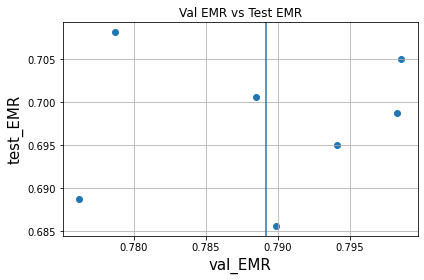

In [ ]:
plotValVsTestResuts(val_emr, test_emr)

In [ ]:
plotResultsByFold(val_emr, test_emr, cnn_summaries.loc[idx,'mean_acc'])

## Experimentos B

### ADAM 4

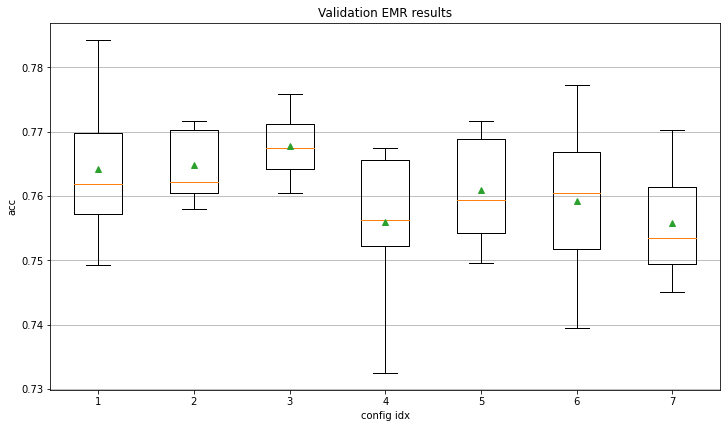

In [ ]:
plotResultsBoxPlots(cnn_val_B1, 'Validation EMR results')

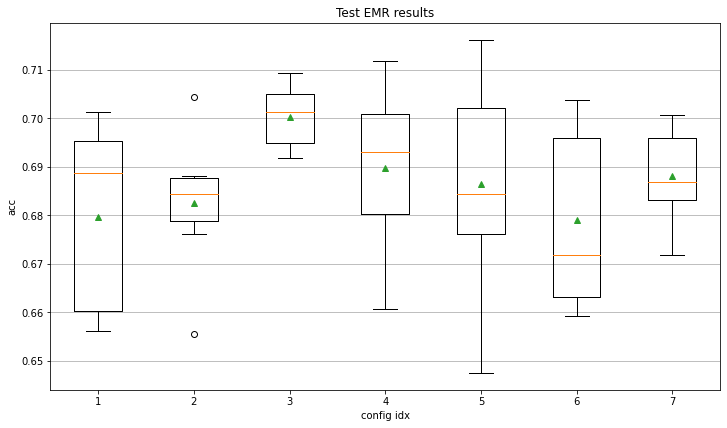

In [ ]:
plotResultsBoxPlots(cnn_test_B1, 'Test EMR results')

### ADAM 5

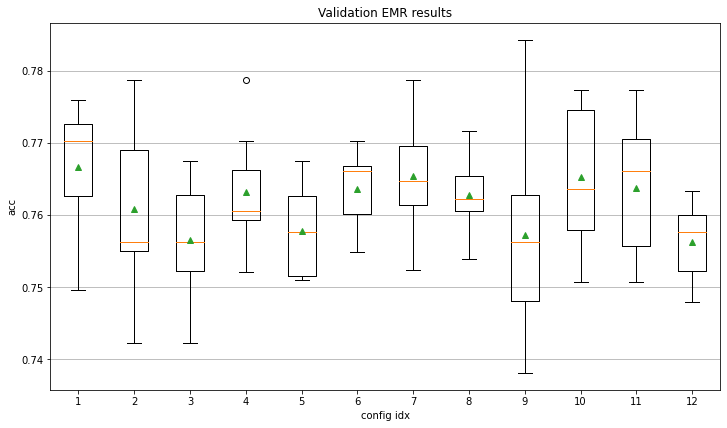

In [ ]:
plotResultsBoxPlots(cnn_val_B2, 'Validation EMR results')

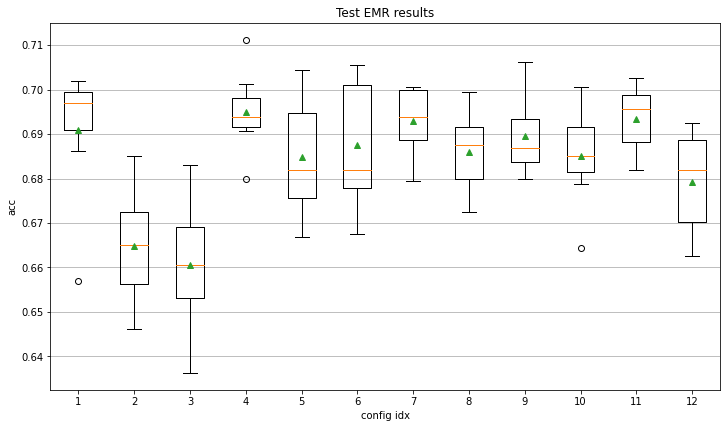

In [ ]:
plotResultsBoxPlots(cnn_test_B2, 'Test EMR results')

In [ ]:
list(cnn_test_B2.values())[0].mean(axis=0)

A_acc       0.746786
B1_acc      0.852411
B2_acc      0.769375
A1_f1       0.723857
B1_f1       0.790672
B2_f1       0.724664
F1_multi    0.746398
EMR         0.690893
dtype: float64

# lstm1

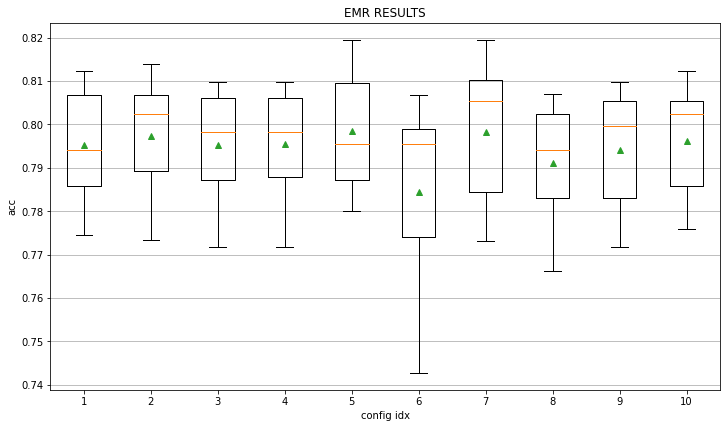

In [ ]:
plotResultsBoxPlots(lstm1_val, 'EMR RESULTS')

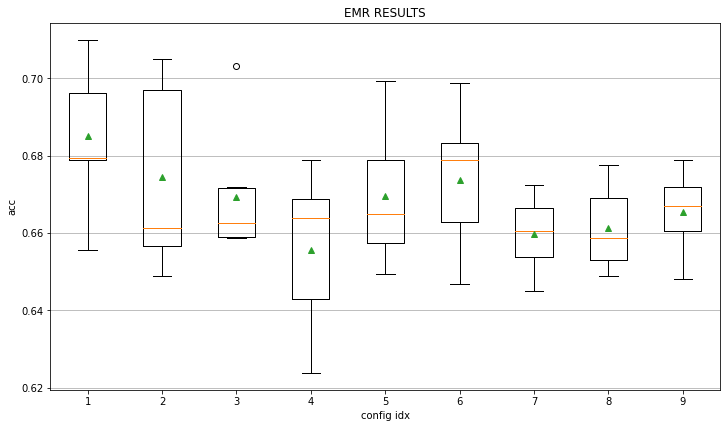

In [ ]:
plotResultsBoxPlots(lstm1_test, 'EMR RESULTS')

In [ ]:
lstm1_val_summaries = getResultsSummary(lstm1_val)

In [ ]:
lstm1_val_summaries.sort_values(by='mean_acc', ascending=False).head()

,min_acc,max_acc,mean_acc,acc_std
4,0.780112,0.819580,0.798399,0.014744
6,0.773109,0.819580,0.798199,0.016305
1,0.773427,0.813986,0.797401,0.013455
9,0.775910,0.812325,0.796201,0.013066
3,0.771709,0.809790,0.795400,0.013079


In [ ]:
lstm1_val_summaries.sort_values(by='acc_std', ascending=True).head()

,min_acc,max_acc,mean_acc,acc_std
2,0.771709,0.809790,0.795199,0.013049
9,0.775910,0.812325,0.796201,0.013066
3,0.771709,0.809790,0.795400,0.013079
0,0.774510,0.812325,0.795199,0.013202
1,0.773427,0.813986,0.797401,0.013455


In [ ]:
idx = 4
val_emr = lstm1_val[f'LSTM-M1-S2-C{idx}']['EMR'].to_numpy()
test_emr = lstm1_test[f'LSTM-M1-S2-C{idx}']['EMR'].to_numpy()

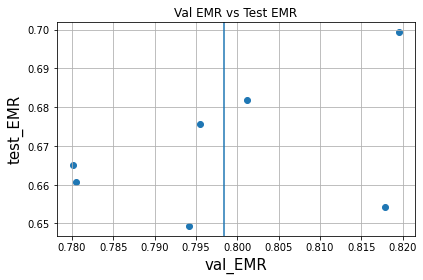

In [ ]:
plotValVsTestResuts(val_emr, test_emr)

# lstm2

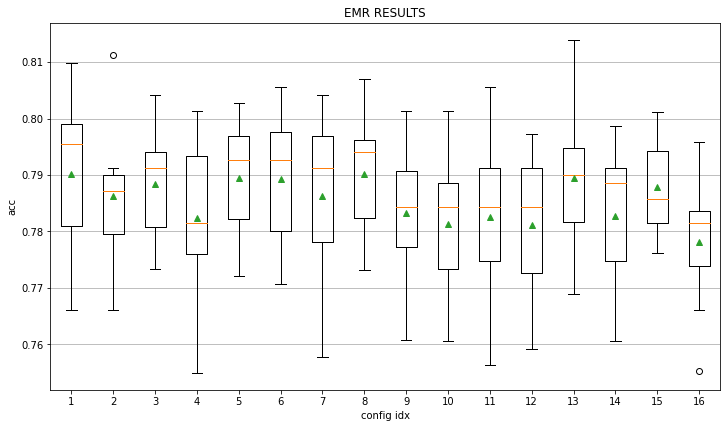

In [ ]:
plotResultsBoxPlots(lstm2_val, 'EMR RESULTS')

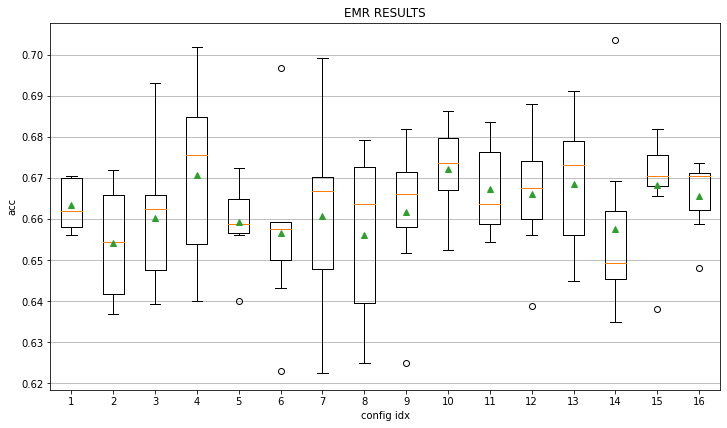

In [ ]:
plotResultsBoxPlots(lstm2_test, 'EMR RESULTS')

In [ ]:
lstm2_val_summaries = getResultsSummary(lstm2_val)

In [ ]:
lstm2_val_summaries.sort_values(by='mean_acc', ascending=False).head()

,min_acc,max_acc,mean_acc,acc_std
7,0.773109,0.806993,0.790200,0.011622
0,0.766106,0.809790,0.790199,0.014426
4,0.772028,0.802797,0.789401,0.011202
12,0.768908,0.813986,0.789398,0.014076
5,0.770629,0.805594,0.789200,0.012142


In [ ]:
lstm2_val_summaries.sort_values(by='acc_std', ascending=True).head()

,min_acc,max_acc,mean_acc,acc_std
14,0.776224,0.801120,0.787801,0.008567
2,0.773427,0.804196,0.788400,0.010324
4,0.772028,0.802797,0.789401,0.011202
7,0.773109,0.806993,0.790200,0.011622
5,0.770629,0.805594,0.789200,0.012142


In [ ]:
idx = 4
val_emr = lstm2_val[f'LSTM-M2-S2-C{idx}']['EMR'].to_numpy()
test_emr = lstm2_test[f'LSTM-M2-S2-C{idx}']['EMR'].to_numpy()

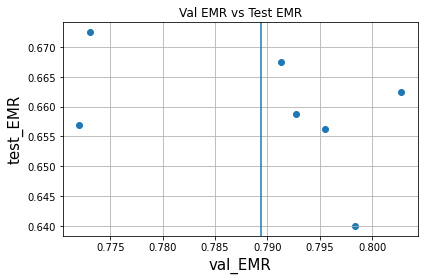

In [ ]:
plotValVsTestResuts(val_emr, test_emr)